In [2]:
import pandas as pd

# Fil och ämneslista
file_path = "riket2023_åk9_np.xlsx"
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Kolumnnamn att använda
kolumnnamn = [
    "Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
    "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
    "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"
]

# Läs in alla blad och tilldela kolumnnamn
data_per_subject = {}
for subject in subjects:
    df = pd.read_excel(file_path, sheet_name=subject, skiprows=8)
    df.columns = kolumnnamn
    data_per_subject[subject] = df 

# Gör numeriska kolumner till float och hantera ogiltiga värden
numeriska_kolumner = kolumnnamn[2:]  # Hoppa över "Plats" och "Huvudman"

for subject, df in data_per_subject.items():
    for kolumn in numeriska_kolumner:
        df[kolumn] = pd.to_numeric(df[kolumn], errors='coerce')

# Skriv ut datatyper för kontroll
for subject, df in data_per_subject.items():
    print(f"\n{subject} – Datatyper efter konvertering:")
    print(df.dtypes)

# Förhandsgranska datan
for subject, df in data_per_subject.items():
    print(f"\n{subject} – Första raderna:")
    print(df.head())


Engelska – Datatyper efter konvertering:
Plats               object
Huvudman            object
Totalt (A-F)         int64
Flickor (A-F)        int64
Pojkar (A-F)         int64
Totalt (A-E)       float64
Flickor (A-E)      float64
Pojkar (A-E)       float64
Totalt (poäng)     float64
Flickor (poäng)    float64
Pojkar (poäng)     float64
dtype: object

Matematik – Datatyper efter konvertering:
Plats               object
Huvudman            object
Totalt (A-F)         int64
Flickor (A-F)        int64
Pojkar (A-F)         int64
Totalt (A-E)       float64
Flickor (A-E)      float64
Pojkar (A-E)       float64
Totalt (poäng)     float64
Flickor (poäng)    float64
Pojkar (poäng)     float64
dtype: object

Svenska – Datatyper efter konvertering:
Plats               object
Huvudman            object
Totalt (A-F)         int64
Flickor (A-F)        int64
Pojkar (A-F)         int64
Totalt (A-E)       float64
Flickor (A-E)      float64
Pojkar (A-E)       float64
Totalt (poäng)     float64
Flickor (

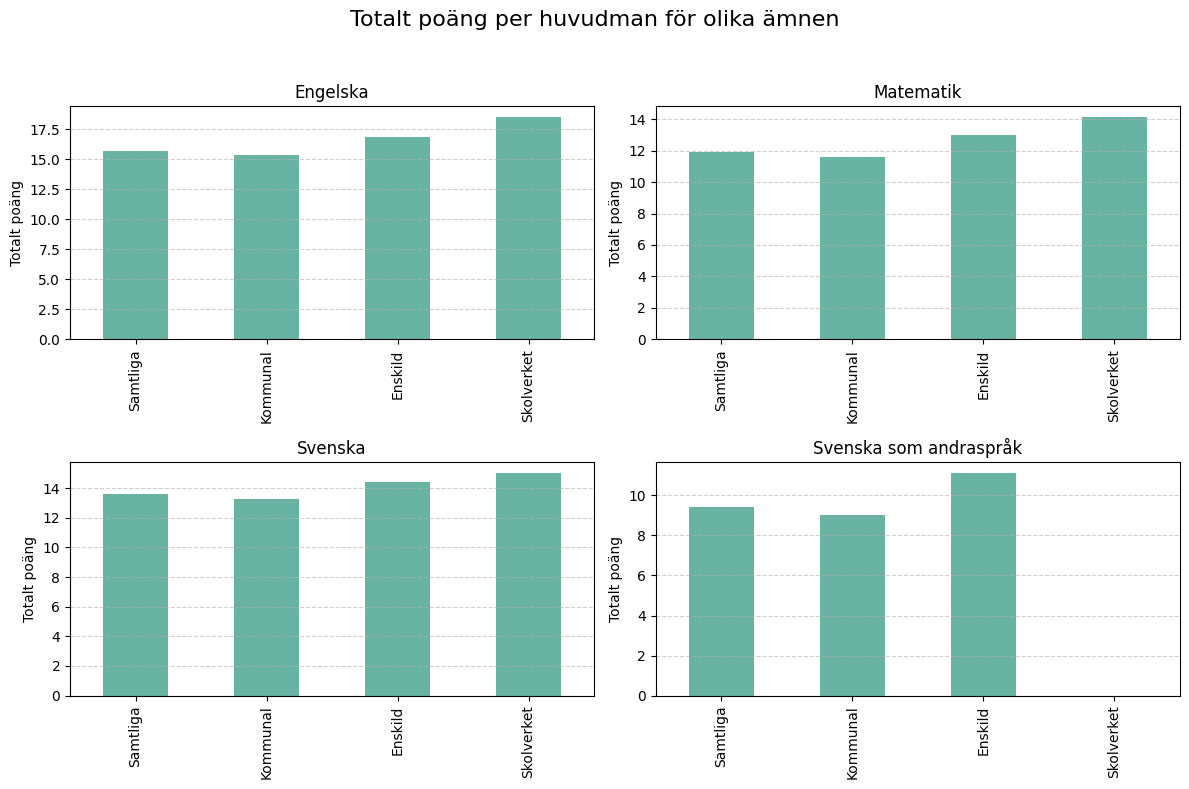

In [3]:
import matplotlib.pyplot as plt
import os

# Katalog där bilden ska sparas
spara_mapp = "Visualiseringar"
os.makedirs(spara_mapp, exist_ok=True)  # Skapa mappen om den inte finns

# Skapa figur och axlar (2x2 rutnät)
fig, axlar = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Totalt poäng per huvudman för olika ämnen", fontsize=16)

# Skapa stapeldiagram för varje ämne
for ax, (subject, df) in zip(axlar.flatten(), data_per_subject.items()):
    df.plot(
        x="Huvudman",
        y="Totalt (poäng)",
        kind="bar",
        ax=ax,
        legend=False,
        color="#69b3a2"
    )
    ax.set_title(subject)
    ax.set_ylabel("Totalt poäng")
    ax.set_xlabel("")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# Justera layout och spara som PNG
plt.tight_layout(rect=[0, 0, 1, 0.95])
bildsökväg = os.path.join(spara_mapp, "totalt_poäng_huvudman.png")
plt.savefig(bildsökväg, dpi=300)
plt.show()

    